In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

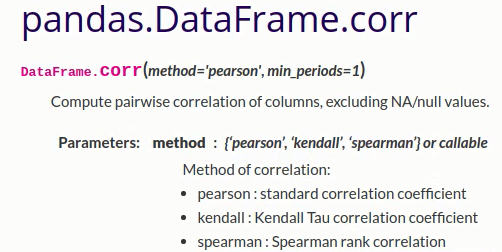

In [2]:
data = pd.read_csv('data/CFB2019.csv')
data.head()

Team  Games Win-Loss  Off Rank  Off Plays  Off Yards  \
0   Air Force (Mountain West)     13     11-2        51        881       5483   
1                 Akron (MAC)     12     0-12       130        725       2918   
2               Alabama (SEC)     13     11-2         6        842       6640   
3  Appalachian St. (Sun Belt)     14     13-1        39        969       6064   
4            Arizona (Pac-12)     12      4-8        30        873       5281   

   Off Yards/Play  Off TDs  Off Yards per Game  Def Rank  ...  \
0            6.22       55               421.8        17  ...   
1            4.02       14               243.2        83  ...   
2            7.89       76               510.8        20  ...   
3            6.26       65               433.1        26  ...   
4            6.05       42               440.1       120  ...   

   Average Time of Possession per Game  Turnover Rank  Fumbles Recovered  \
0                                34:28             78                  9   
1                                26:29            128                  6   
2                                29:59              3                 11   
3                                31:19              7                 10   
4                                27:24             89                  4   

   Opponents Intercepted  Turnovers Gain  Fumbles Lost  \
0                      7              16            12   
1                      5              11            12   
2                     17              28             4   
3                     14              24             3   
4                     11              15             6   

   Interceptions Thrown.y  Turnovers Lost  Turnover Margin  \
0                       6              18               -2   
1                      14              26              -15   
2                       6              10               18   
3                       6               9               15   
4                      12              18               -3   

   Avg Turnover Margin per Game  
0                         -0.15  
1                         -1.25  
2                          1.38  
3                          1.07  
4                         -0.25  

[5 rows x 146 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 146 entries, Team to Avg Turnover Margin per Game
dtypes: float64(29), int64(113), object(4)
memory usage: 148.4+ KB


In [4]:
temp = data['Win-Loss'].str.split('-', expand=True)
temp

0   1
0    11   2
1     0  12
2    11   2
3    13   1
4     4   8
..   ..  ..
125   5   7
126   9   4
127   7   6
128  10   4
129   8   5

[130 rows x 2 columns]

In [10]:
data['Win'] = temp[0]
data['Loss'] = temp[1]
data.drop('Win-Loss', axis=1, inplace=True)

In [12]:
data.head()

Team  Games  Off Rank  Off Plays  Off Yards  \
0   Air Force (Mountain West)     13        51        881       5483   
1                 Akron (MAC)     12       130        725       2918   
2               Alabama (SEC)     13         6        842       6640   
3  Appalachian St. (Sun Belt)     14        39        969       6064   
4            Arizona (Pac-12)     12        30        873       5281   

   Off Yards/Play  Off TDs  Off Yards per Game  Def Rank  Def Plays  ...  \
0            6.22       55               421.8        17        752  ...   
1            4.02       14               243.2        83        871  ...   
2            7.89       76               510.8        20        877  ...   
3            6.26       65               433.1        26        940  ...   
4            6.05       42               440.1       120        889  ...   

   Fumbles Recovered  Opponents Intercepted  Turnovers Gain  Fumbles Lost  \
0                  9                      7              16            12   
1                  6                      5              11            12   
2                 11                     17              28             4   
3                 10                     14              24             3   
4                  4                     11              15             6   

   Interceptions Thrown.y  Turnovers Lost  Turnover Margin  \
0                       6              18               -2   
1                      14              26              -15   
2                       6              10               18   
3                       6               9               15   
4                      12              18               -3   

   Avg Turnover Margin per Game  Win  Loss  
0                         -0.15   11     2  
1                         -1.25    0    12  
2                          1.38   11     2  
3                          1.07   13     1  
4                         -0.25    4     8  

[5 rows x 147 columns]

#### we want to calculate correlation, before we have to make every values numeric

In [29]:
data['Win'] = data['Win'].apply(pd.to_numeric, errors='coerce')
data['Loss'] = data['Loss'].apply(pd.to_numeric, errors='coerce')

In [30]:
data_corr = data.corr(numeric_only=True)
data_corr

Games  Off Rank  Off Plays  Off Yards  \
Games                         1.000000 -0.428834   0.723447   0.718944   
Off Rank                     -0.428834  1.000000  -0.690523  -0.905437   
Off Plays                     0.723447 -0.690523   1.000000   0.816111   
Off Yards                     0.718944 -0.905437   0.816111   1.000000   
Off Yards/Play                0.546835 -0.873236   0.515047   0.911832   
...                                ...       ...        ...        ...   
Turnovers Lost               -0.098361  0.172833  -0.085804  -0.190193   
Turnover Margin               0.374522 -0.302050   0.363652   0.382880   
Avg Turnover Margin per Game  0.373135 -0.307953   0.364384   0.384573   
Win                           0.867916 -0.547510   0.715855   0.773413   
Loss                         -0.783464  0.555317  -0.676846  -0.750219   

                              Off Yards/Play   Off TDs  Off Yards per Game  \
Games                               0.546835  0.692083            0.482391   
Off Rank                           -0.873236 -0.830671           -0.965303   
Off Plays                           0.515047  0.710931            0.725735   
Off Yards                           0.911832  0.931386            0.953635   
Off Yards/Play                      1.000000  0.877672            0.918381   
...                                      ...       ...                 ...   
Turnovers Lost                     -0.229351 -0.271778           -0.203087   
Turnover Margin                     0.326770  0.466668            0.333572   
Avg Turnover Margin per Game        0.331377  0.465112            0.338122   
Win                                 0.651545  0.774386            0.613811   
Loss                               -0.649794 -0.759559           -0.622071   

                              Def Rank  Def Plays  Yards Allowed  ...  \
Games                        -0.547758   0.531203      -0.178491  ...   
Off Rank                      0.045477  -0.380261      -0.117841  ...   
Off Plays                    -0.309555   0.517653      -0.033043  ...   
Off Yards                    -0.270537   0.477476      -0.011506  ...   
Off Yards/Play               -0.185525   0.337854       0.000899  ...   
...                                ...        ...            ...  ...   
Turnovers Lost                0.167823  -0.025825       0.173010  ...   
Turnover Margin              -0.326729   0.273556      -0.218249  ...   
Avg Turnover Margin per Game -0.322663   0.273457      -0.211483  ...   
Win                          -0.649593   0.409990      -0.367941  ...   
Loss                          0.647073  -0.352309       0.406359  ...   

                              Fumbles Recovered  Opponents Intercepted  \
Games                                  0.198436               0.501139   
Off Rank                              -0.031026              -0.388771   
Off Plays                              0.170164               0.517100   
Off Yards                              0.084929               0.492944   
Off Yards/Play                         0.024240               0.374042   
...                                         ...                    ...   
Turnovers Lost                        -0.110072              -0.313476   
Turnover Margin                        0.482081               0.692212   
Avg Turnover Margin per Game           0.483736               0.691192   
Win                                    0.230569               0.569342   
Loss                                  -0.228460              -0.560768   

                              Turnovers Gain  Fumbles Lost  \
Games                               0.498812      0.081529   
Off Rank                           -0.312263     -0.021580   
Off Plays                           0.493675      0.048992   
Off Yards                           0.423642      0.025569   
Off Yards/Play                      0.297022      0.003668   
...                                      ...           ...   
Turnove

In [31]:
data_corr['Win']

Games                           0.867916
Off Rank                       -0.547510
Off Plays                       0.715855
Off Yards                       0.773413
Off Yards/Play                  0.651545
                                  ...   
Turnovers Lost                 -0.305809
Turnover Margin                 0.545360
Avg Turnover Margin per Game    0.544279
Win                             1.000000
Loss                           -0.988655
Name: Win, Length: 144, dtype: float64

In [32]:
data_corr['Loss']

Games                          -0.783464
Off Rank                        0.555317
Off Plays                      -0.676846
Off Yards                      -0.750219
Off Yards/Play                 -0.649794
                                  ...   
Turnovers Lost                  0.352856
Turnover Margin                -0.569051
Avg Turnover Margin per Game   -0.568118
Win                            -0.988655
Loss                            1.000000
Name: Loss, Length: 144, dtype: float64

In [34]:
data_corr_k = data.corr(method='kendall', numeric_only=True)
data_corr_k

Games  Off Rank  Off Plays  Off Yards  \
Games                         1.000000 -0.333696   0.575926   0.569697   
Off Rank                     -0.333696  1.000000  -0.506877  -0.813145   
Off Plays                     0.575926 -0.506877   1.000000   0.611781   
Off Yards                     0.569697 -0.813145   0.611781   1.000000   
Off Yards/Play                0.404334 -0.726481   0.333293   0.723297   
...                                ...       ...        ...        ...   
Turnovers Lost               -0.133555  0.151544  -0.076209  -0.151430   
Turnover Margin               0.310062 -0.213739   0.228781   0.256672   
Avg Turnover Margin per Game  0.310602 -0.215630   0.231043   0.259181   
Win                           0.786640 -0.381265   0.521522   0.565604   
Loss                         -0.725968  0.391045  -0.499003  -0.553358   

                              Off Yards/Play   Off TDs  Off Yards per Game  \
Games                               0.404334  0.546527            0.333514   
Off Rank                           -0.726481 -0.663847           -0.999642   
Off Plays                           0.333293  0.495063            0.506819   
Off Yards                           0.723297  0.755046            0.812959   
Off Yards/Play                      1.000000  0.687322            0.726502   
...                                      ...       ...                 ...   
Turnovers Lost                     -0.161259 -0.202293           -0.151722   
Turnover Margin                     0.215687  0.323795            0.214059   
Avg Turnover Margin per Game        0.217087  0.323492            0.215948   
Win                                 0.434372  0.572367            0.381151   
Loss                               -0.436952 -0.563610           -0.390932   

                              Def Rank  Def Plays  Yards Allowed  ...  \
Games                        -0.455670   0.407712      -0.170482  ...   
Off Rank                      0.029699  -0.255078      -0.093165  ...   
Off Plays                    -0.205549   0.344113      -0.028821  ...   
Off Yards                    -0.165086   0.331203       0.015031  ...   
Off Yards/Play               -0.107233   0.226560       0.028097  ...   
...                                ...        ...            ...  ...   
Turnovers Lost                0.121777  -0.071340       0.098171  ...   
Turnover Margin              -0.208876   0.205815      -0.127432  ...   
Avg Turnover Margin per Game -0.205741   0.206085      -0.123990  ...   
Win                          -0.490269   0.301080      -0.262519  ...   
Loss                          0.495595  -0.276046       0.281201  ...   

                              Fumbles Recovered  Opponents Intercepted  \
Games                                  0.197038               0.391740   
Off Rank                              -0.028981              -0.273193   
Off Plays                              0.121371               0.352362   
Off Yards                              0.087826               0.337106   
Off Yards/Play                         0.022131               0.257276   
...                                         ...                    ...   
Turnovers Lost                        -0.066891              -0.224676   
Turnover Margin                        0.333903               0.506236   
Avg Turnover Margin per Game           0.329302               0.507916   
Win                                    0.174091               0.410784   
Loss                                  -0.165487              -0.407940   

                              Turnovers Gain  Fumbles Lost  \
Games                               0.423810      0.045798   
Off Rank                           -0.227157      0.002001   
Off Plays                           0.345416      0.038498   
Off Yards                           0.311713      0.013885   
Off Yards/Play                      0.214847      0.000627   
...                                      ...           ...   
Turnove

In [35]:
data_corr[data_corr['Win'] > 0.70]

Games  Off Rank  Off Plays  Off Yards  Off Yards/Play  \
Games             1.000000 -0.428834   0.723447   0.718944        0.546835   
Off Plays         0.723447 -0.690523   1.000000   0.816111        0.515047   
Off Yards         0.718944 -0.905437   0.816111   1.000000        0.911832   
Off TDs           0.692083 -0.830671   0.710931   0.931386        0.877672   
First Downs       0.720041 -0.861360   0.863310   0.965422        0.829256   
Redzone Attempts  0.681399 -0.713753   0.760233   0.833363        0.714482   
Redzone Scores    0.698976 -0.723100   0.743658   0.847254        0.746294   
Touchdowns        0.713648 -0.813150   0.712858   0.925669        0.869491   
PAT               0.719355 -0.796595   0.716262   0.915216        0.850549   
Total Points      0.743258 -0.815548   0.751397   0.942284        0.870334   
Points Per Game   0.613020 -0.853910   0.697639   0.919599        0.883641   
Win               0.867916 -0.547510   0.715855   0.773413        0.651545   

                   Off TDs  Off Yards per Game  Def Rank  Def Plays  \
Games             0.692083            0.482391 -0.547758   0.531203   
Off Plays         0.710931            0.725735 -0.309555   0.517653   
Off Yards         0.931386            0.953635 -0.270537   0.477476   
Off TDs           1.000000            0.874920 -0.309721   0.439741   
First Downs       0.898097            0.910578 -0.313211   0.425140   
Redzone Attempts  0.826560            0.767995 -0.387682   0.353320   
Redzone Scores    0.851244            0.777929 -0.415699   0.324269   
Touchdowns        0.993045            0.859981 -0.340708   0.438119   
PAT               0.971899            0.843895 -0.365964   0.440647   
Total Points      0.977928            0.871168 -0.371879   0.455771   
Points Per Game   0.966021            0.902067 -0.298834   0.399902   
Win               0.774386            0.613811 -0.649593   0.409990   

                  Yards Allowed  ...  Fumbles Recovered  \
Games                 -0.178491  ...           0.198436   
Off Plays             -0.033043  ...           0.170164   
Off Yards             -0.011506  ...           0.084929   
Off TDs               -0.064124  ...           0.188927   
First Downs           -0.061638  ...           0.069057   
Redzone Attempts      -0.140934  ...           0.143745   
Redzone Scores        -0.165756  ...           0.121919   
Touchdowns            -0.087586  ...           0.201982   
PAT                   -0.113613  ...           0.202086   
Total Points          -0.108137  ...           0.192773   
Points Per Game       -0.083735  ...           0.186654   
Win                   -0.367941  ...           0.230569   

                  Opponents Intercepted  Turnovers Gain  Fumbles Lost  \
Games                          0.501139        0.498812      0.081529   
Off Plays                      0.517100        0.493675      0.048992   
Off Yards                      0.492944        0.423642      0.025569   
Off TDs                        0.481053        0.477874      0.005149   
First Downs                    0.513597        0.429583      0.026767   
Redzone Attempts               0.518849        0.478939      0.055089   
Redzone Scores                 0.513616        0.461724      0.034316   
Touchdowns                     0.498251        0.498788      0.001103   
PAT                            0.507201        0.505605      0.014297   
Total Points                   0.531693        0.518429     -0.002190   
Points Per Game                0.498777        0.489869     -0.019171   
Win                            0.569342        0.569814     -0.015865   

                  Interceptions Thrown.y  Turnovers Lost  Turnover Margin  \
Games                          -0.189599       -0.098361         0.374522   
Off Plays                      -0.147441       -0.085804         0.363652   
Off Yards                      -0.259455       -0.190193         0.382880   
Off TDs                        -0.345286       -0.271778

In [37]:
data_corr[data_corr['Win'] > 0.70]['Win']

Games               0.867916
Off Plays           0.715855
Off Yards           0.773413
Off TDs             0.774386
First Downs         0.765177
Redzone Attempts    0.733191
Redzone Scores      0.771868
Touchdowns          0.800132
PAT                 0.811616
Total Points        0.836112
Points Per Game     0.763336
Win                 1.000000
Name: Win, dtype: float64

In [38]:
data_corr[data_corr['Win'] < -0.70]['Win']

First Down Rank               -0.734900
Scoring Def Rank              -0.740314
Avg Points per Game Allowed   -0.753355
Scoring Off Rank              -0.734829
Loss                          -0.988655
Name: Win, dtype: float64

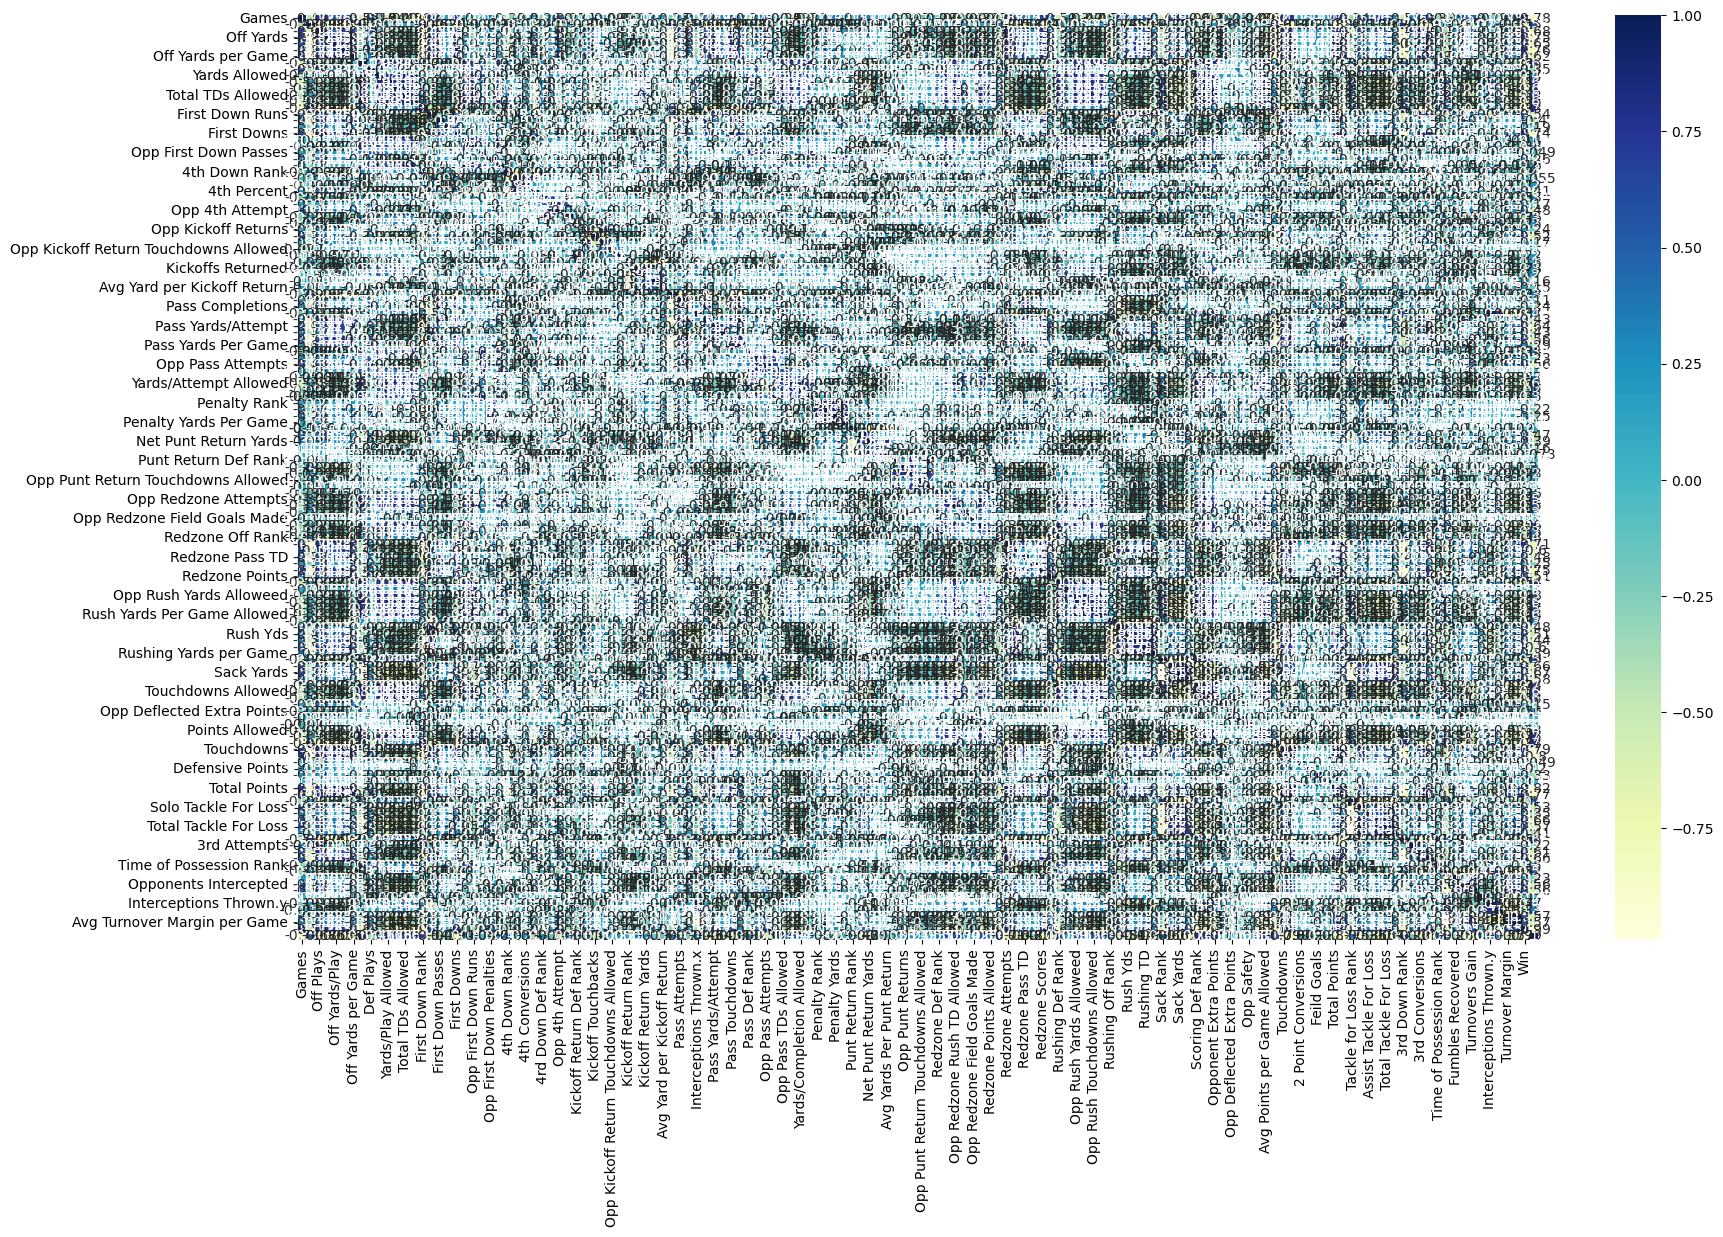

In [39]:
plt.figure(figsize=(20, 12))
sns.heatmap(data_corr, cmap='YlGnBu', annot=True)
plt.show()

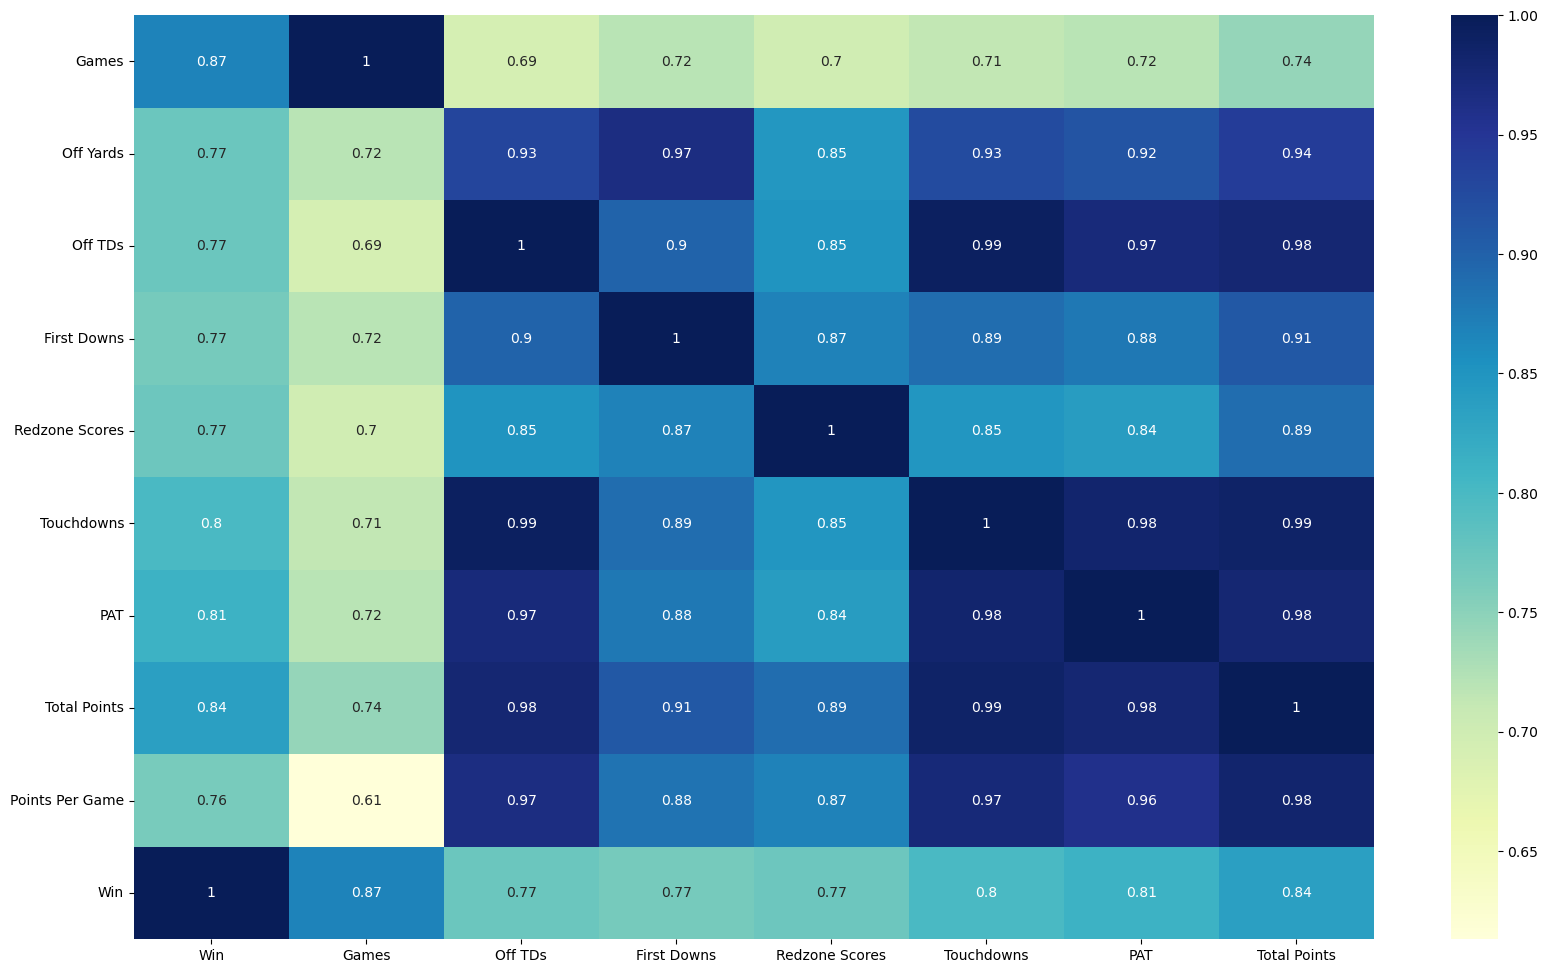

In [50]:
data_to_show = data_corr[data_corr['Win'] > 0.75][['Win','Games', 'Off TDs', 'First Downs', 'Redzone Scores', 'Touchdowns', 'PAT', 'Total Points']]

plt.figure(figsize=(20, 12))
sns.heatmap(data_to_show, cmap='YlGnBu', annot=True)
plt.show()

In [51]:
sns.pairplot(data_to_show)
plt.show()